In [17]:
import uproot
import awkward as ak
import hist
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
f = uproot.open('/local/cms/user/eichl008/ldmx/eat/v14/8gev/bkgd/true-inclusive-0-with-tracking/category_trueinclusive_Nevents_100k_MaxTries_1_run_0000_track_yes.root')

In [4]:
f['LDMX_Events/RecoilTracks_track'].show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
RecoilTracks_track                       | vector<ldmx::Track>      | AsGroup(<TBranchElement 'Recoi
RecoilTracks_track.n_hits_               | int32_t[]                | AsJagged(AsDtype('>i4'))
RecoilTracks_track.n_outliers_           | int32_t[]                | AsJagged(AsDtype('>i4'))
RecoilTracks_track.ndf_                  | int32_t[]                | AsJagged(AsDtype('>i4'))
RecoilTracks_track.n_shared_hits_        | int32_t[]                | AsJagged(AsDtype('>i4'))
RecoilTracks_track.n_holes_              | int32_t[]                | AsJagged(AsDtype('>i4'))
RecoilTracks_track.chi2_                 | double[]                 | AsJagged(AsDtype('>f8'))
RecoilTracks_track.perigee_pars_         | std::vector<double>[]    | AsObjects(AsArray(True, Fal...
RecoilTracks_track.perigee

In [5]:
tracks = ak.zip({
    member : f[f'LDMX_Events/RecoilTracks_track/RecoilTracks_track.{member}_'].array()
    for member in [
        'n_hits', 'n_outliers', 'ndf', 'n_shared_hits', 'n_holes', 'chi2',
        'perigee_pars', 'perigee_cov', 'perigee',
        'momentum', 'position', 'meas_idxs',
        'outlier_idxs', 'hole_idxs', 'trackID', 'truthProb', 'pdgID'
    ]
}, depth_limit=2) # zip down 2 depths (which event and which track in an event)

In [6]:
tracks

<Array [[{n_hits: 10, ...}], ..., [{...}]] type='100000 * var * {n_hits: in...'>

In [6]:
tracks.momentum[:,:,0]

<Array [[7.8], [4.41], [...], ..., [7.74], [6.91]] type='10 * var * float64'>

In [13]:
true_momentum = ak.zip({
    c: f[f'LDMX_Events/PEFFP{c}_eat'].array()
    for c in ['x','y','z']
})

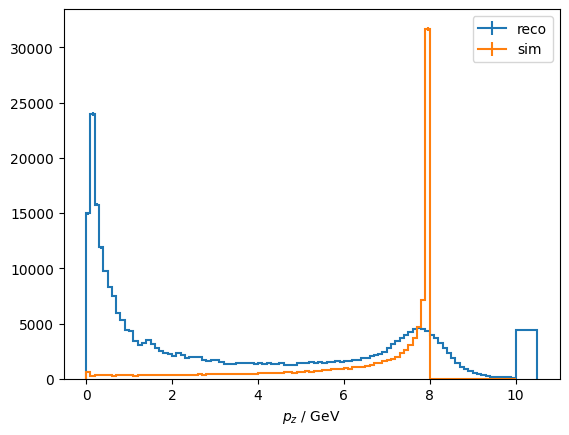

In [19]:
(
    hist.Hist.new
    .StrCat(['reco','sim'])
    .Reg(100,0,10,label='$p_z$ / GeV')
    .Double()
).fill(
    'reco', ak.flatten(tracks.momentum[:,:,0])
).fill(
    'sim', true_momentum.z/1000
).plot(
    flow='show'
)
plt.legend()
plt.show()